In [1]:
import sys
# setting path
sys.path.append("/home/ky2446/simclr")
sys.path.append("/home/ky2446/simclr/simclr")
sys.path.append("/home/ky2446/simclr/simclr/layers")
sys.path.append("/home/ky2446/simclr/simclr/models")
sys.path.append("/home/ky2446/simclr/simclr/loss")
sys.path.append("/home/ky2446/simclr/simclr/optim")
sys.path.append("/home/ky2446/simclr/simclr/dataloader")

In [2]:
from simclrpy import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
train_loader_simclr = train_loader_simclr("CIFAR10",256)
test_loader = test_loader("CIFAR10",256)
test_images, test_labels = get_testimgs_list("CIFAR10")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
proj_dim = 64
model = SimClr('resnet50',proj_dim).cuda()
temperature = 0.5
#criterion = nt_xent_loss
criterion = SimCLR_Loss(256,0.5)
optimizer = "Adam"
model, train_loss = train_simclr(train_loader_simclr,model,criterion,optimizer,100,256,True,"/home/ky2446/saved-models/CIFAR10-RES50-SIMCLR-BS256-PD64-ADAM")

Epoch: 0, step: 50/195, loss: 6.225878715515137
Epoch: 0, step: 100/195, loss: 6.061517238616943
Epoch: 0, step: 150/195, loss: 6.00684118270874
Epoch: 0 completed, average loss: 6.099120805202387, time taken: 0.8175824761390686 mins
Epoch: 1, step: 50/195, loss: 5.920451641082764
Epoch: 1, step: 100/195, loss: 5.962253570556641
Epoch: 1, step: 150/195, loss: 5.932281970977783
Epoch: 1 completed, average loss: 5.882033621959197, time taken: 0.8051161805788676 mins
Epoch: 2, step: 50/195, loss: 5.821677207946777
Epoch: 2, step: 100/195, loss: 5.612573146820068
Epoch: 2, step: 150/195, loss: 5.604712963104248
Epoch: 2 completed, average loss: 5.6953910876543095, time taken: 0.7970365246136983 mins
Epoch: 3, step: 50/195, loss: 5.479160785675049
Epoch: 3, step: 100/195, loss: 5.495090007781982
Epoch: 3, step: 150/195, loss: 5.498569011688232
Epoch: 3 completed, average loss: 5.5252902520008575, time taken: 0.8006825645764669 mins
Epoch: 4, step: 50/195, loss: 5.427651405334473
Epoch: 4, s

Epoch: 34 completed, average loss: 4.877003268706493, time taken: 0.7987056930859884 mins
Epoch: 35, step: 50/195, loss: 4.865466594696045
Epoch: 35, step: 100/195, loss: 4.9239678382873535
Epoch: 35, step: 150/195, loss: 4.866499900817871
Epoch: 35 completed, average loss: 4.872535155369685, time taken: 0.8014144738515218 mins
Epoch: 36, step: 50/195, loss: 4.914242744445801
Epoch: 36, step: 100/195, loss: 4.816160202026367
Epoch: 36, step: 150/195, loss: 4.830829620361328
Epoch: 36 completed, average loss: 4.871978329389523, time taken: 0.8023232618967692 mins
Epoch: 37, step: 50/195, loss: 4.881181716918945
Epoch: 37, step: 100/195, loss: 4.839019775390625
Epoch: 37, step: 150/195, loss: 4.903511047363281
Epoch: 37 completed, average loss: 4.873266467069969, time taken: 0.8022482236226399 mins
Epoch: 38, step: 50/195, loss: 4.844518184661865
Epoch: 38, step: 100/195, loss: 4.857245922088623
Epoch: 38, step: 150/195, loss: 4.845776081085205
Epoch: 38 completed, average loss: 4.867729

Epoch: 69, step: 50/195, loss: 4.7710981369018555
Epoch: 69, step: 100/195, loss: 4.76853084564209
Epoch: 69, step: 150/195, loss: 4.775761127471924
Epoch: 69 completed, average loss: 4.8017838037931, time taken: 0.8100858052571615 mins
Epoch: 70, step: 50/195, loss: 4.796313762664795
Epoch: 70, step: 100/195, loss: 4.798799514770508
Epoch: 70, step: 150/195, loss: 4.777335166931152
Epoch: 70 completed, average loss: 4.799234043023525, time taken: 0.8036102533340455 mins
Epoch: 71, step: 50/195, loss: 4.863138198852539
Epoch: 71, step: 100/195, loss: 4.830225467681885
Epoch: 71, step: 150/195, loss: 4.781579971313477
Epoch: 71 completed, average loss: 4.799134112627078, time taken: 0.7948929230372112 mins
Epoch: 72, step: 50/195, loss: 4.78087854385376
Epoch: 72, step: 100/195, loss: 4.796347618103027
Epoch: 72, step: 150/195, loss: 4.823950290679932
Epoch: 72 completed, average loss: 4.797146202967717, time taken: 0.8035939812660218 mins
Epoch: 73, step: 50/195, loss: 4.79215812683105

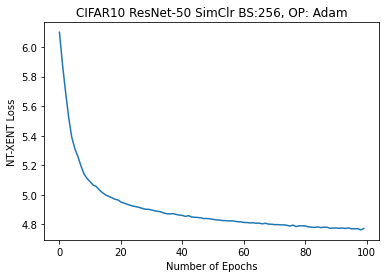

In [6]:
plt.xlabel("Number of Epochs")
plt.ylabel("NT-XENT Loss")
plt.title("CIFAR10 ResNet-50 SimClr BS:256, OP: Adam")
plt.plot(train_loss)
plt.savefig("/home/ky2446/figures/CIFAR10-RES50-SIMCLR-BS256-PD64-ADAM.png")

In [7]:
with open("/home/ky2446/training-logs/CIFAR10-RES50-SIMCLR-BS256-PD64-ADAM", "wb") as fp: 
    pickle.dump(train_loss, fp)